<a href="https://colab.research.google.com/github/ArthurSampaio13/TimeSeries/blob/main/AnalisandoSeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

matplotlib.rcParams['figure.figsize'] = [12, 6]

# AirPassengers

https://www.kaggle.com/datasets/georgerocha/airpassengers

#### 1. Leitura dos dados

In [ ]:
dados = pd.read_csv('/content/AirPassengers.csv', index_col = 0, parse_dates=True)

Renomeando a coluna

In [ ]:
dados.columns = ['AirPassengers']

### 2. Breve visualização da Series

In [ ]:
dados.head(), dados.tail()

(            AirPassengers
 Month                    
 1949-01-01            112
 1949-02-01            118
 1949-03-01            132
 1949-04-01            129
 1949-05-01            121,
             AirPassengers
 Month                    
 1960-08-01            606
 1960-09-01            508
 1960-10-01            461
 1960-11-01            390
 1960-12-01            432)

> Os valores vão de 1949 até 1960

In [ ]:
dados.describe()

,AirPassengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
dados.shape

(144, 1)

> Mínimo de 104 e máximo de 622
- Uma média de 280
- Com 144 linhas

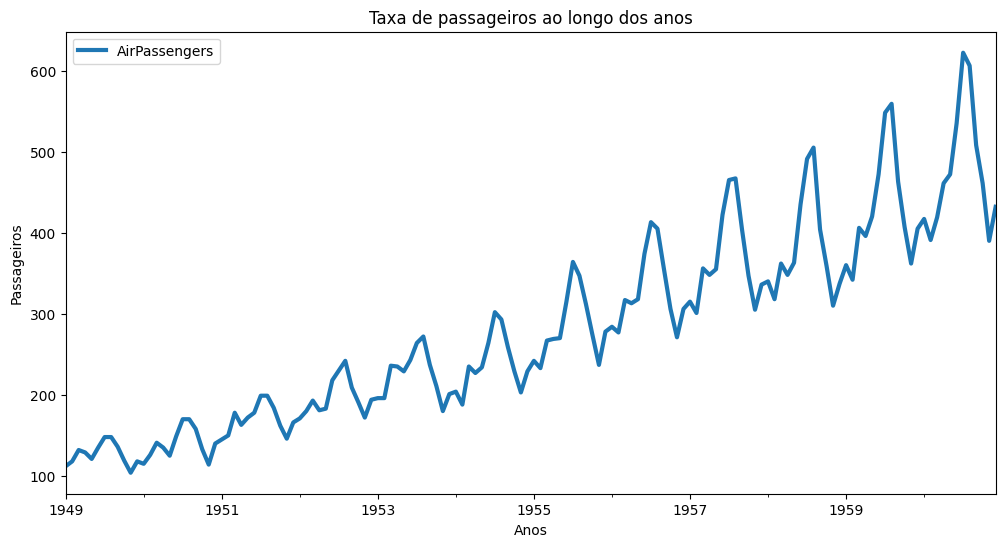

In [ ]:
dados.plot(linewidth=3,
           fontsize=10,
           title='Taxa de passageiros ao longo dos anos');

plt.xlabel('Anos', fontsize=10);
plt.ylabel('Passageiros', fontsize=10);

> Interpretação do resultado:
- Aparentemente existe uma tendência
- Aparentemente existe uma sazonalidade
- Aparentemente a amplitude da sazonalidade aumenta conforme a tendência, isso pode sugerir um relacionamento multiplicativo
- Como há tendência e sazonalidade isso dá fortes índicios que a Series não é estacionária

### 3. Visualizando ano a ano para observer comportamentos individuais

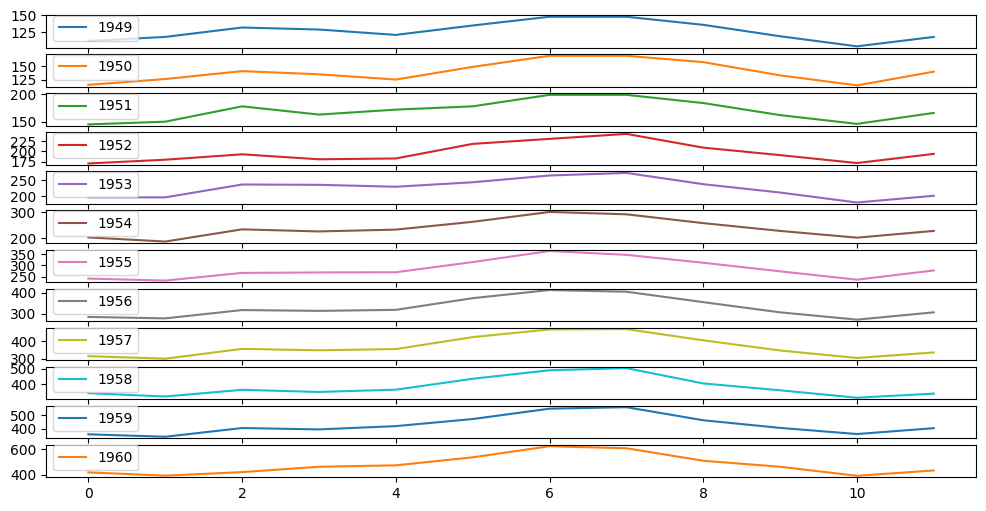

In [ ]:
grupos = (dados['1949':'1960']).squeeze().groupby(pd.Grouper(freq='A'))
anos = pd.DataFrame()

for nome, grupo in grupos:
  anos[nome.year] = grupo.values

anos.plot(subplots=True);

> Interpretação do resultado:
- Pode-se observar uma forte sazonalidade no meio do ano (Provavelmente ocorrendo por períodos de férias)

### 4. Observando a tendência e sazonalidade na Series

In [ ]:
resultado = seasonal_decompose(dados, model='multiplicative')

### 5. Tendência

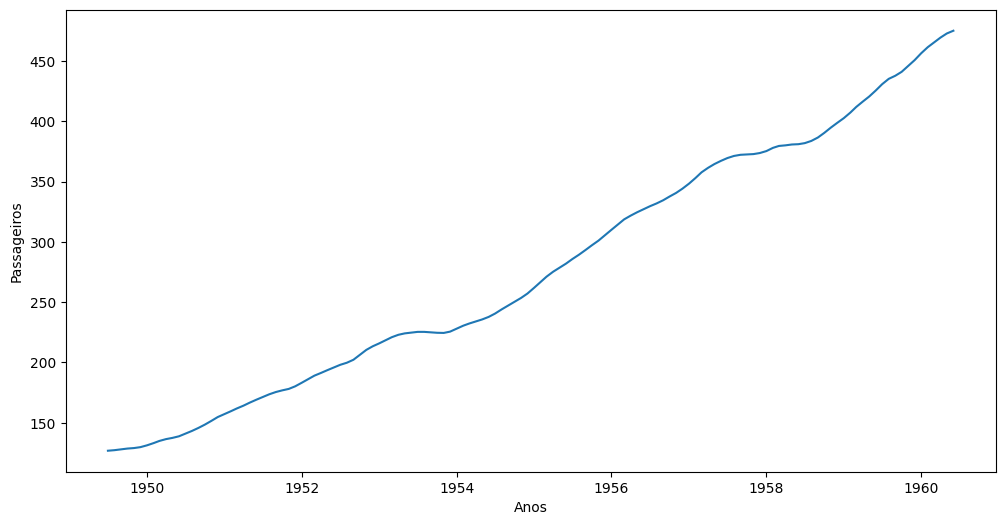

In [ ]:
plt.plot(resultado.trend)
plt.xlabel("Anos")
plt.ylabel("Passageiros")
plt.show()

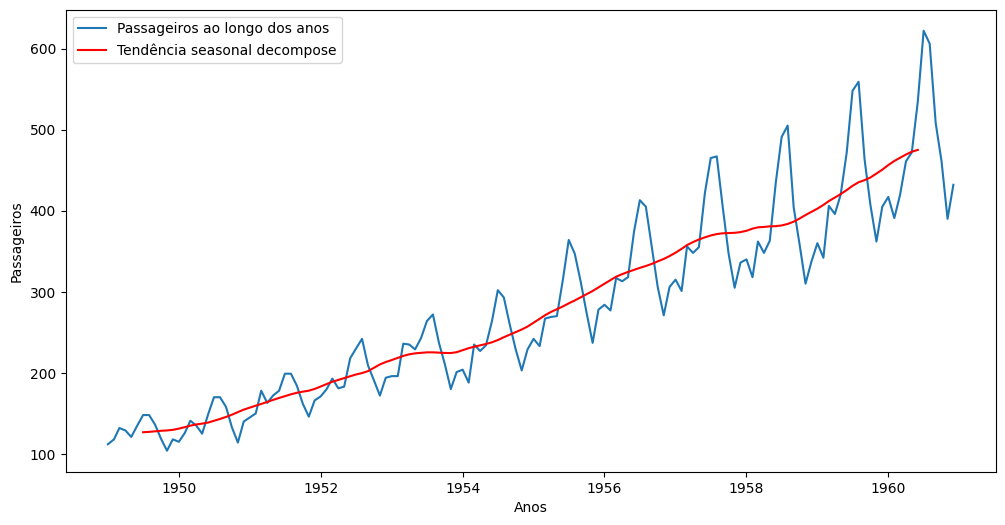

In [ ]:
plt.plot(dados, label='Passageiros ao longo dos anos')
plt.plot(resultado.trend, color='red', label='Tendência seasonal decompose')
plt.xlabel("Anos")
plt.ylabel("Passageiros")
plt.legend()
plt.show()

> Interpretação do resultado:
- Confirma-se a forte tendência

### 6. Sazonalidade

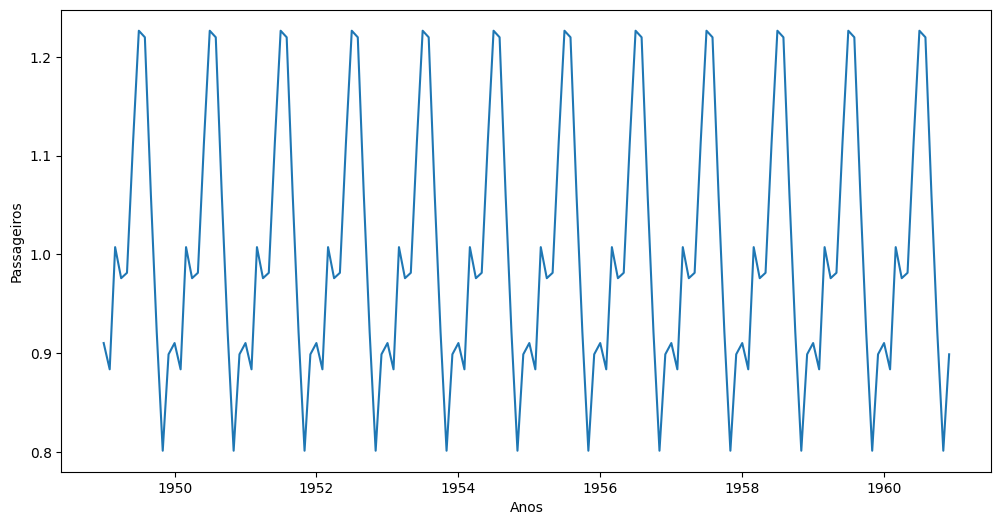

In [ ]:
plt.plot(resultado.seasonal)
plt.xlabel("Anos")
plt.ylabel("Passageiros")
plt.show()

> Interpretação do resultado:
- Confirma-se a forte sazonalidade ocorrendo nos períodos no meio do ano

## 7. Autocorrelação

 O gráfico **A**uto**C**orrelation **F**unction `ACF` mostra a correlação entre pontos de dados em uma Série Temporal e seus pontos anteriores (LAGS), ajudando a identificar padrões de dependência serial na série. Ele é útil para entender a estrutura da série temporal e escolher modelos de previsão apropriados.

Verificando se há valores nulos para que o gráfico de ACF não tenha erros

In [ ]:
dados.isnull().sum()

AirPassengers    0
dtype: int64

> Series sem valores nulos

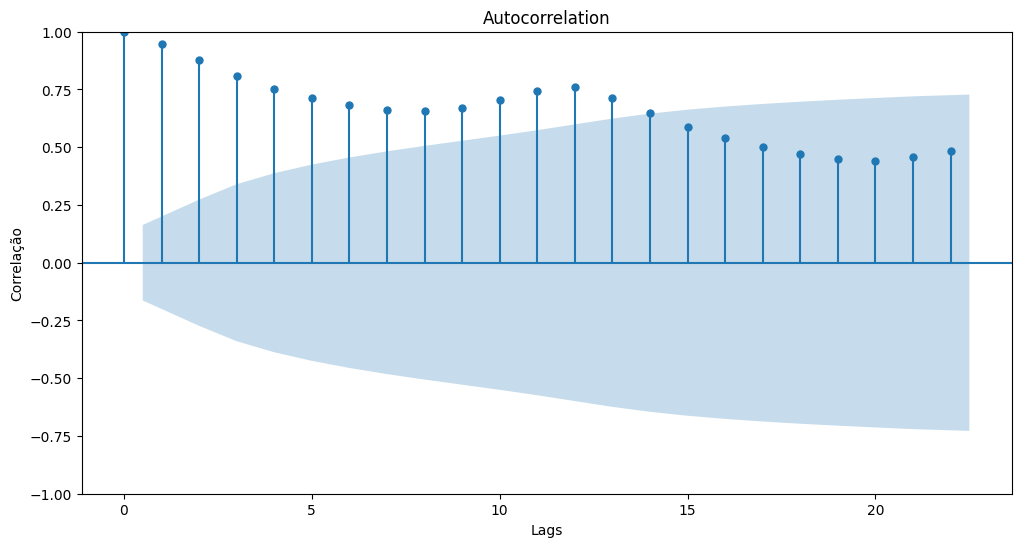

In [ ]:
plot_acf(dados)
plt.xlabel("Lags")
plt.ylabel("Correlação")
plt.show()

Interpretação do resultado:
- Até provavelmente o `lag 13` são bons valores para utilizar na previsão de valores futuros, pois estão no intervalo e são estatisticamente relevantes
- A partir do mês 8 começa uma ascensão que continua até o mês 12
- É possível notar uma pico de 12 em 12 meses
- A partir do valor de lag 14, quando os valores de autocorrelação saem do intervalo de confiança de 95%, eles são considerados estatisticamente irrelevantes. Isso significa que não há evidências significativas de correlação entre os valores da série temporal para esses intervalos de tempo, e qualquer correlação observada pode ser atribuída ao acaso

## 8. Verificando a estacionaridade com Adfuller

> Verificar se os dados temporais são estacionários (estão em torno da média) ou não

Para essa verificação usaremos o teste de hipóteses, onde escolhemos uma hipótese para ser nula e tentamos rejeitar ela. O algoritmo que usaremos para testar a hipótese é o `ADF` (Augmented Dickey-Fuller) que é um método estatístico

Nesse caso, a hipótese nula é: série temporal não é estacionária

In [ ]:
resultado = adfuller(dados)

print('p-value', resultado[1])

p-value 0.991880243437641


> Interpretação do resultado:

Como o valor de `p-value` foi superior a 0.05, falhamos em rejeitar a hipótese nula usando o teste ADF e falhando em rejeitar a hipótese nula, temos que aceitar que **a série temporal não é estacionária**

Obs. Quanto mais próximo de 0, devemos aceitar a hipótese nula e quanto mais perto de 1, rejeitar

# Microsoft stocks

https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis

### 1. Leitura dos dados

In [ ]:
dados = pd.read_csv('/content/Microsoft_Stock.csv')

### 2. Selecionando as colunas importantes para análise

In [ ]:
dados = dados[['Date', 'Close']]

### 3. Transformação a coluna Date e colocando ela como index

In [ ]:
dados['Date'] = pd.to_datetime(dados['Date'])

In [ ]:
dados = dados.set_index('Date')

### 4. Transformando dados diários em mensais com a média

In [ ]:
dados = dados.resample("M").mean()

### 5. Breve visualização dos dados

In [ ]:
dados.head(), dados.tail()

(                Close
 Date                 
 2015-04-30  43.466667
 2015-05-31  47.530000
 2015-06-30  45.964091
 2015-07-31  45.611818
 2015-08-31  45.506667,
                  Close
 Date                  
 2020-11-30  214.139000
 2020-12-31  217.963182
 2021-01-31  221.975263
 2021-02-28  240.066842
 2021-03-31  233.674348)

> Os valores vão de 2015 até 2021

In [ ]:
dados.describe()

,Close
count,72.000000
mean,107.499165
std,57.014459
min,43.466667
25%,58.227562
50%,93.056905
75%,138.393908
max,240.066842


In [ ]:
dados.shape

(72, 1)

> Mínimo de 43 e máximo de 240
- Uma média de 107
- Com 72 linhas

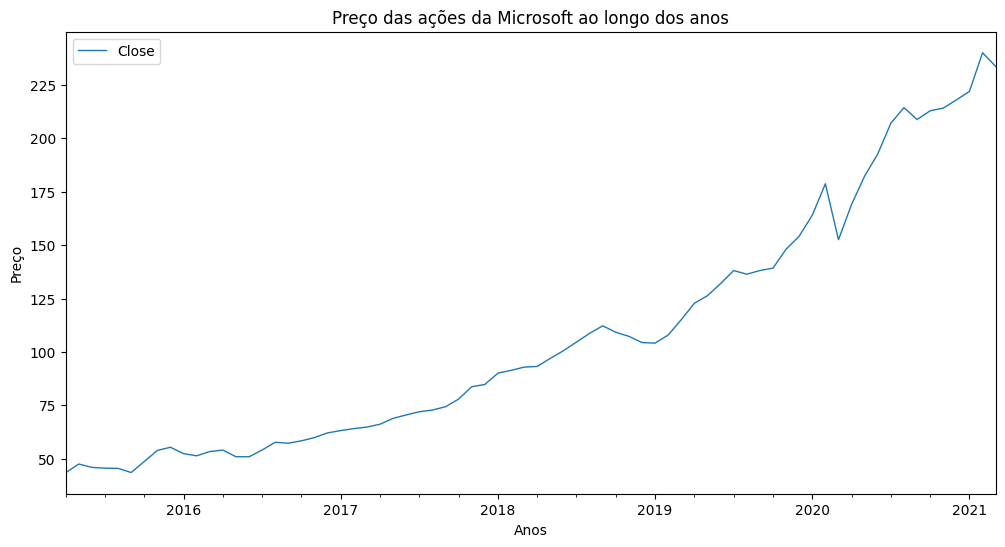

In [ ]:
dados.plot(linewidth=1,
           fontsize=10,
           title='Preço das ações da Microsoft ao longo dos anos');

plt.xlabel('Anos', fontsize=10);
plt.ylabel('Preço', fontsize=10);

> Interpretação do resultado:
- Aparentemente há uma tendência
- Uma leve queda em 2020, provavelmente em decorrência da pandemia
- Como há tendência isso dá fortes índicios que a Series não é estacionária
- A aparente tendência de crescimento exponencial sugere que há um relacionamento multiplicativo entre as variáveis ao longo do tempo.

### Observando a tendência e sazonalidade na Series

In [ ]:
resultado = seasonal_decompose(dados, period=12, model='multiplicative')

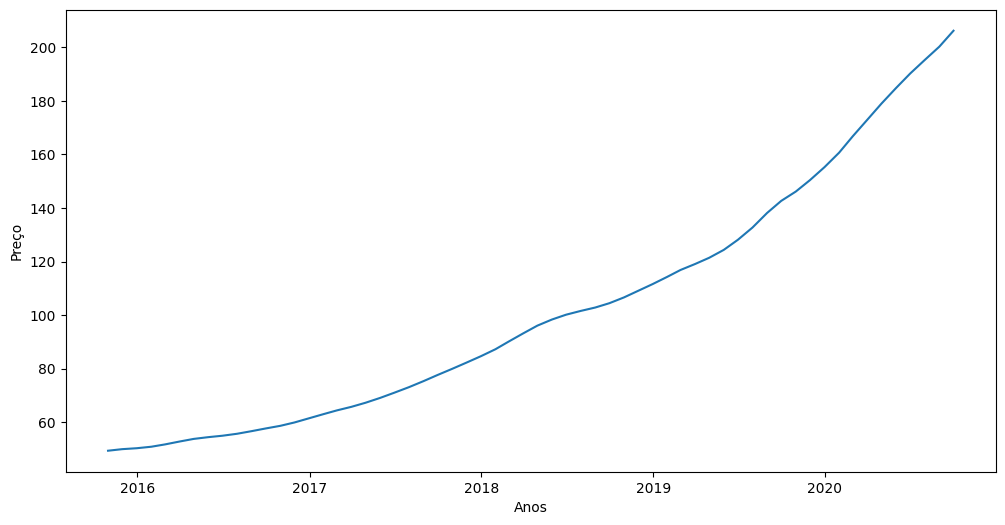

In [ ]:
plt.plot(resultado.trend)
plt.xlabel("Anos")
plt.ylabel("Preço")
plt.show()

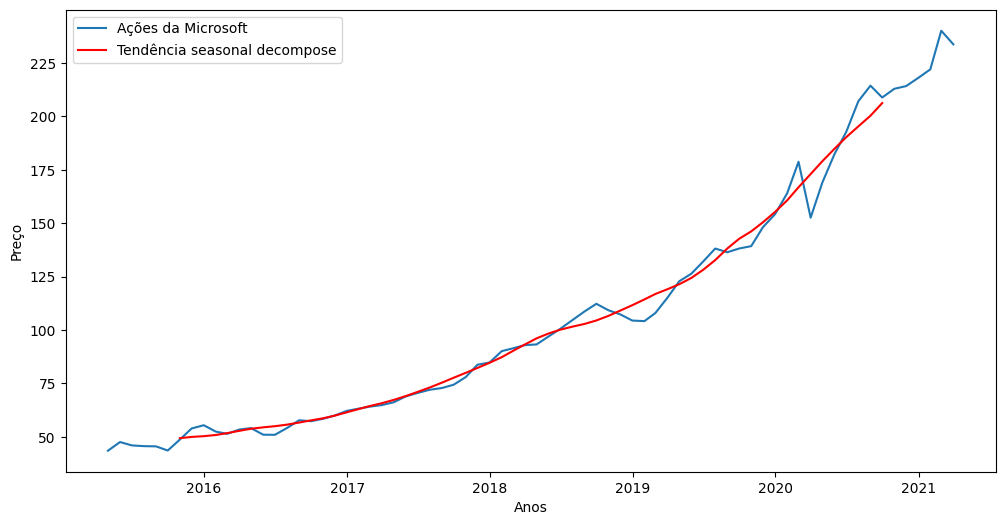

In [ ]:
plt.plot(dados, label='Ações da Microsoft')
plt.plot(resultado.trend, color='red', label='Tendência seasonal decompose')
plt.legend()
plt.xlabel("Anos")
plt.ylabel("Preço")
plt.show()

> Interpretação do resultado:
- Confirma-se uma forte tendência positiva

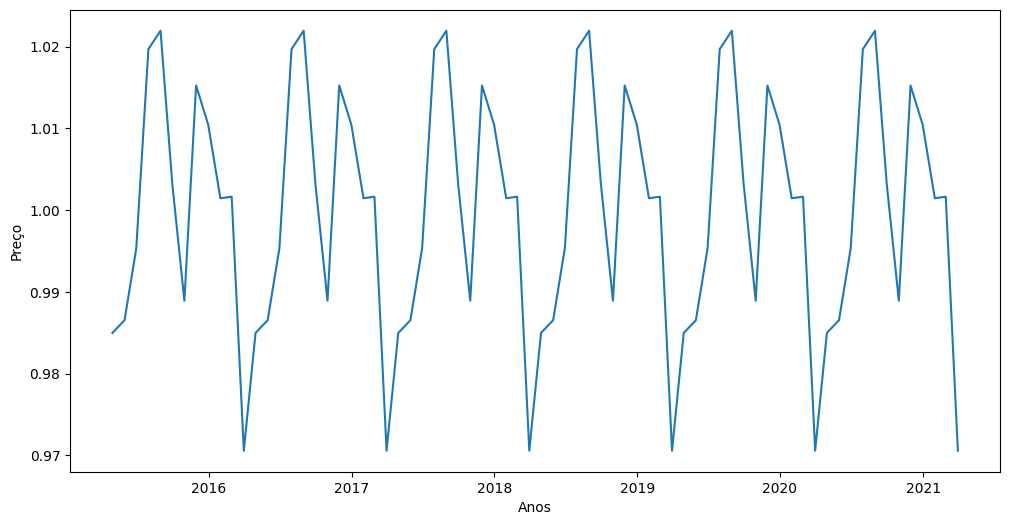

In [ ]:
plt.plot(resultado.seasonal)
plt.xlabel("Anos")
plt.ylabel("Preço")
plt.show()

> Interpretação do resultado:
- Há um efeito sazonal com um aumento ocorrendo um pouco depois do início do ano, seguido por um pico um pouco depois do meio do ano, e uma queda novamente em direção ao final do ano.

## 8. Autocorrelação

 O gráfico `ACF` mostra a correlação entre pontos de dados em uma série temporal e seus pontos anteriores, ajudando a identificar padrões de dependência serial na série. Ele é útil para entender a estrutura da série temporal e escolher modelos de previsão apropriados.

Verificando se há valores nulos para que o gráfico de ACF não tenha erros

In [ ]:
dados.isnull().sum()

Close    0
dtype: int64

> Não há valores nulos

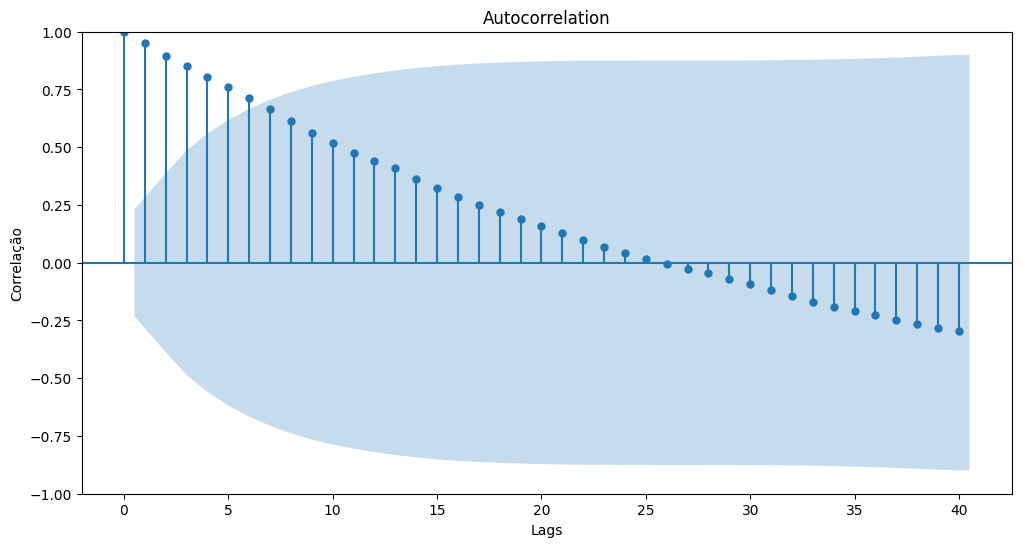

In [ ]:
plot_acf(dados, lags=40)
plt.xlabel("Lags")
plt.ylabel("Correlação")
plt.show()

> Interpretação do resultado:
- Até provavelmente o `lag 6` são bons valores para utilizar na previsão
- A partir do valor de lag 7, quando os valores de autocorrelação saem do intervalo de confiança de 95%, eles são considerados estatisticamente irrelevantes. Isso significa que não há evidências significativas de correlação entre os valores da série temporal para esses intervalos de tempo, e qualquer correlação observada pode ser atribuída ao acaso

## 9. Verificando a estacionaridade com Adfuller

> Verificar se os dados temporais são estacionários (estão em torno da média) ou não

Para essa verificação usaremos o teste de hipóteses, onde escolhemos uma hipótese para ser nula e tentamos rejeitar ela. O algoritmo que usaremos para testar a hipótese é o `ADF` (Augmented Dickey-Fuller) que é um método estatístico

Nesse caso, a hipótese nula é: série temporal não é estacionária

In [ ]:
resultado = adfuller(dados)

print('p-value', resultado[1])

p-value 1.0


> Interpretação do resultado:

Como o valor de `p-value` foi superior a 0.05, falhamos em rejeitar a hipótese nula usando o teste ADF e falhando em rejeitar a hipótese nula, temos que aceitar que **a série temporal não é estacionária**

Obs. Quanto mais próximo de 0, devemos aceitar a hipótese nula e quanto mais perto de 1, rejeitar

# Vendas de casas

https://www.kaggle.com/datasets/htagholdings/property-sales?select=raw_sales.csv

### 1. Leitura dos dados

In [ ]:
dados = pd.read_csv('/content/raw_sales.csv')

### 2. Selecionando as colunas de análise

In [ ]:
dados = dados[['datesold', 'price']]

### 3. Transformação a coluna Date e colocando ela como index

In [ ]:
dados.loc[:, 'datesold'] = pd.to_datetime(dados['datesold'])

In [ ]:
dados = dados.set_index('datesold')

### 4. Transformando dados diários em mensais

In [ ]:
dados = dados.resample("M").mean()

### 5. Breve visualização dos dados

In [ ]:
dados.head(), dados.tail()

(                    price
 datesold                 
 2007-02-28  407500.000000
 2007-03-31  339333.333333
 2007-04-30  798000.000000
 2007-05-31  339500.000000
 2007-06-30  520333.333333,
                     price
 datesold                 
 2019-03-31  651666.737288
 2019-04-30  655325.561321
 2019-05-31  641491.136364
 2019-06-30  703275.396825
 2019-07-31  583192.056000)

> Os valores vão de 2007 até 2019

In [ ]:
dados.describe()

,price
count,150.000000
mean,578152.125428
std,70777.605996
min,339333.333333
25%,534999.695428
50%,572404.514807
75%,629281.557728
max,798000.000000


In [ ]:
dados.shape

(150, 1)

> Mínimo de 339333 e máximo de 798000
- Média de 578152
- Com 150 linhas

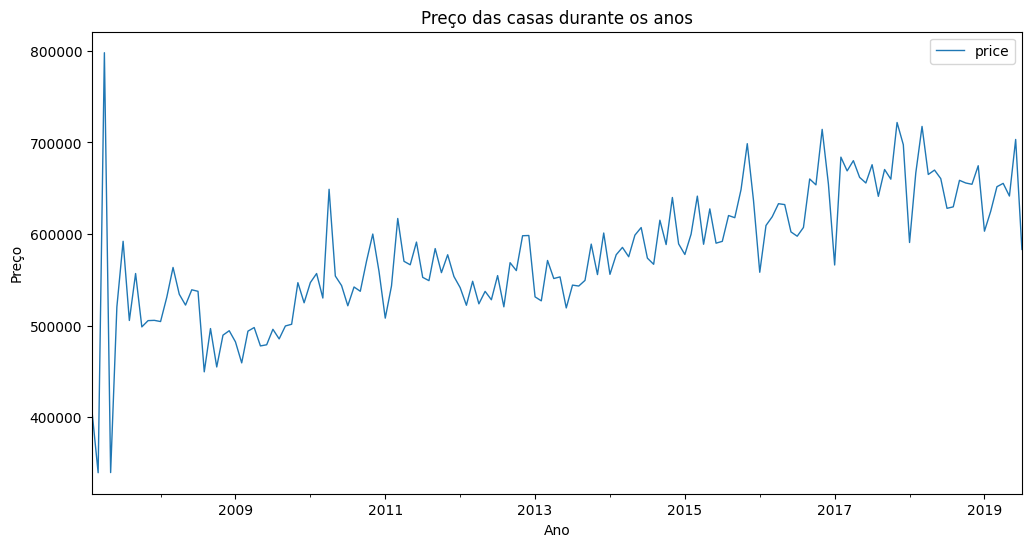

In [ ]:
dados.plot(linewidth=1,
           fontsize=10,
           title='Preço das casas durante os anos');

plt.xlabel('Ano', fontsize=10);
plt.ylabel('Preço', fontsize=10);

> Interpretação dos resultados:
- Um forte pico acontencedo antes de 2008 e logo uma queda, provavelmente ocorrendo devido a crise de 2008 quando a bolha imobiliária estourou
- Aparentemente há uma tendência
- Aparentemente há sazonalidade
- Como há tendência e sazonalidade dá indícios da Series não ser estacionária

### Fazendo a decomposicao da Serie para ver tendência e sazonalidade

In [ ]:
resultado = seasonal_decompose(dados)

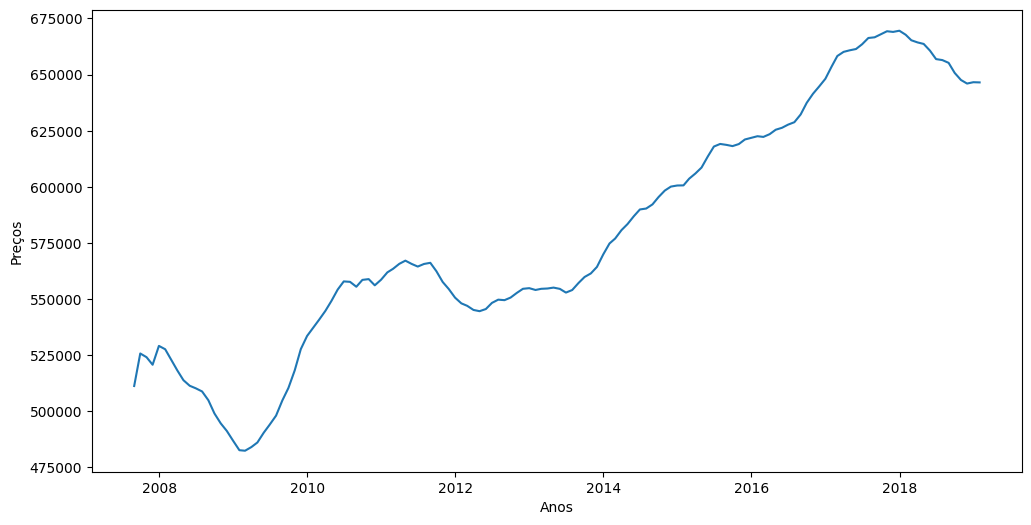

In [ ]:
plt.plot(resultado.trend)
plt.xlabel("Anos")
plt.ylabel("Preços")
plt.show()

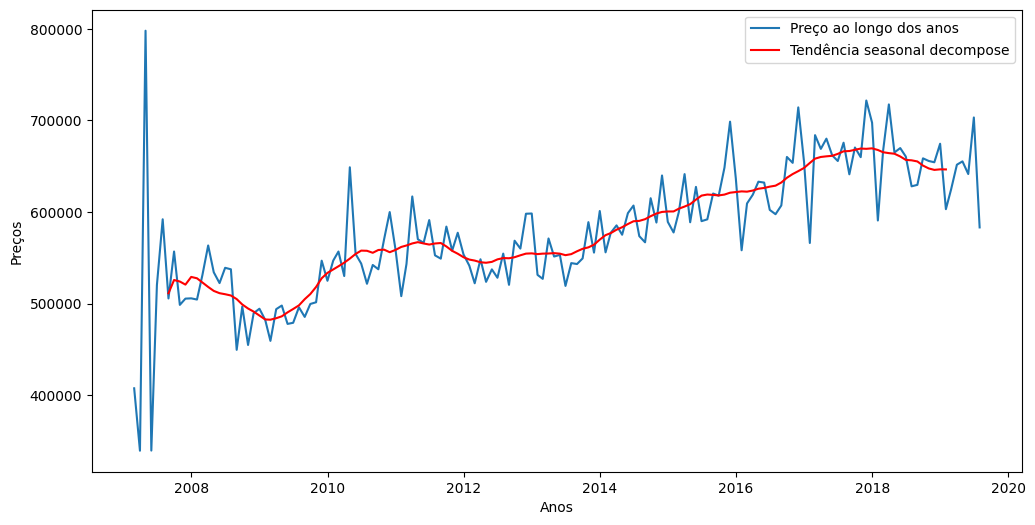

In [ ]:
plt.plot(dados, label='Preço ao longo dos anos')
plt.plot(resultado.trend, color='red', label='Tendência seasonal decompose')
plt.legend()
plt.xlabel("Anos")
plt.ylabel("Preços")
plt.show()

> Interpretação do resultado:
- Confirma-se a tendência positiva

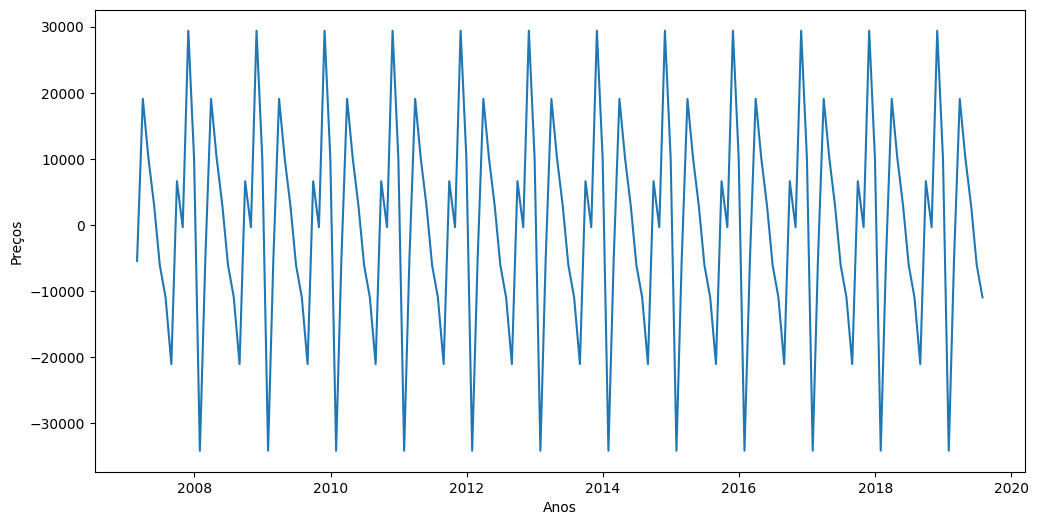

In [ ]:
plt.plot(resultado.seasonal)
plt.xlabel("Anos")
plt.ylabel("Preços")
plt.show()

> Interpretação do resultado:
- Confirma-se o efeito de sazonalidade no começo e fim de ano

## 8. Autocorrelação

 O gráfico `ACF` mostra a correlação entre pontos de dados em uma série temporal e seus pontos anteriores, ajudando a identificar padrões de dependência serial na série. Ele é útil para entender a estrutura da série temporal e escolher modelos de previsão apropriados.

Verificando se há valores nulos para que o gráfico de ACF não tenha erros

In [ ]:
dados.isnull().sum()

price    0
dtype: int64

> Não há valores nulos

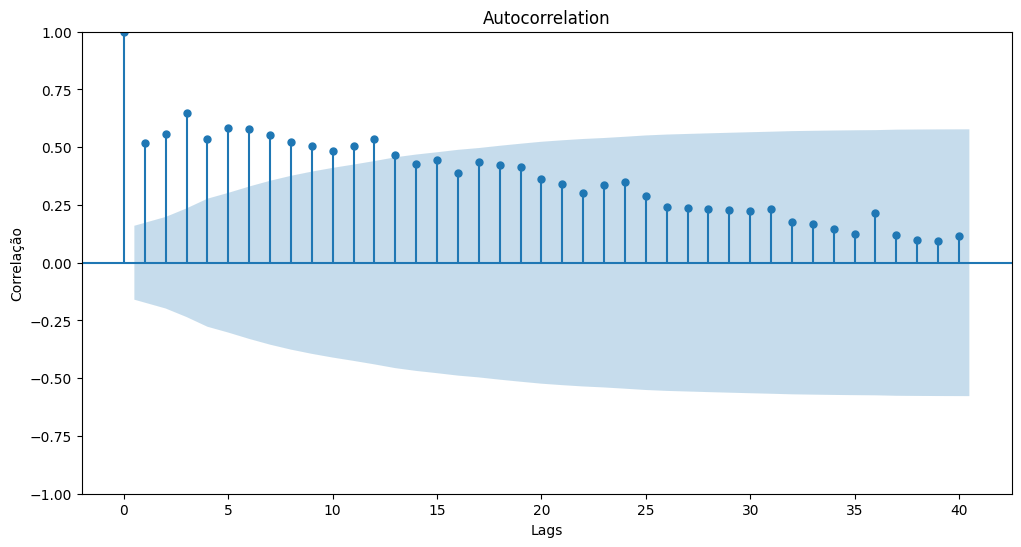

In [ ]:
plot_acf(dados, lags=40)
plt.xlabel("Lags")
plt.ylabel("Correlação")
plt.show()

> Interpretação do resultado:
- Até provavelmente o `lag 12` são bons valores para utilizar na previsão
- Também é possível notar o efeito da sazonalidade no gráfico -com um mês 12 tendo um ápice - por exemplo
- A partir do valor de lag 13, quando os valores de autocorrelação saem do intervalo de confiança de 95%, eles são considerados estatisticamente irrelevantes. Isso significa que não há evidências significativas de correlação entre os valores da série temporal para esses intervalos de tempo, e qualquer correlação observada pode ser atribuída ao acaso

## 9. Verificando a estacionaridade com Adfuller

> Verificar se os dados temporais são estacionários (estão em torno da média) ou não

Para essa verificação usaremos o teste de hipóteses, onde escolhemos uma hipótese para ser nula e tentamos rejeitar ela. O algoritmo que usaremos para testar a hipótese é o `ADF` (Augmented Dickey-Fuller) que é um método estatístico

Nesse caso, a hipótese nula é: série temporal não é estacionária

In [ ]:
resultado = adfuller(dados)

print('p-value', resultado[1])

p-value 0.8567877254659417


> Interpretação do resultado:

Como o valor de `p-value` foi superior a 0.05, falhamos em rejeitar a hipótese nula usando o teste ADF e falhando em rejeitar a hipótese nula, temos que aceitar que **a série temporal não é estacionária**

Obs. Quanto mais próximo de 0, devemos aceitar a hipótese nula e quanto mais perto de 1, rejeitar